**Uso de la librería Pytorch**

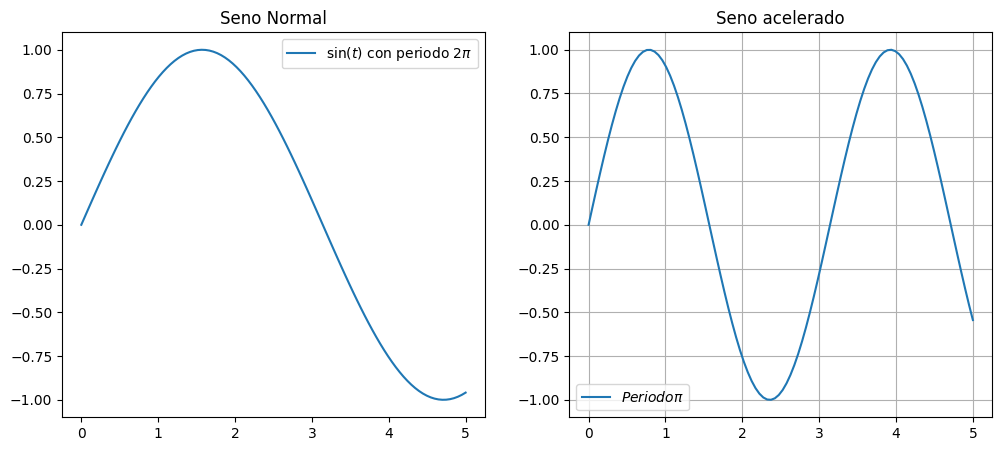

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

t=np.linspace(0,5,100)
fig,ax=plt.subplots(1,2,figsize=(12,5))
a,b=ax[0],ax[1]
a.plot(t, np.sin(t), label=r"$\sin(t)$ con periodo $2\pi$")
b.plot(t,np.sin(2*t),label=r"Periodo $\pi$")
a.set_title("Seno Normal")
b.set_title("Seno acelerado")
a.legend(loc="best")
b.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
import torch
import torch.nn as nn #Distintos tipos de capas, funciones de activación y funciones de costo
import torch.optim as op ##Distintos algoritmos de optimización basados en gradiente descedente

# 1. DATOS: Creamos ejemplos para que la IA aprenda (X: entrada, Y: salida esperada)
# Usamos tensores, que son los "arrays" de PyTorch
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], dtype=torch.float32)

# 2. MODELO: Una neurona simple (Linear) que recibe 1 dato y da 1 respuesta
modelo = nn.Linear(in_features=1, out_features=1)

# 3. CONFIGURACIÓN: ¿Cómo medimos el error y cómo mejoramos?
medidor_error = nn.MSELoss() # Mide qué tan lejos estamos del resultado real
optimizador = torch.optim.SGD(modelo.parameters(), lr=0.01) # El "entrenador" que ajusta los pesos

# 4. ENTRENAMIENTO: Repetimos el proceso 100 veces
for epoca in range(100):
    # Paso A: La IA hace una predicción
    prediccion = modelo(X)
    
    # Paso B: Calculamos qué tan mal lo hizo (el error)
    error = medidor_error(prediccion, Y)
    
    # Paso C: PyTorch calcula automáticamente cómo mejorar (Backpropagation)
    error.backward()
    
    # Paso D: El optimizador ajusta la neurona y borra los cálculos viejos
    optimizador.step()
    optimizador.zero_grad()

# 5. PRUEBA: Vamos a pedirle que calcule 2 * 10
resultado = modelo(torch.tensor([10.0]))
print(f"La IA dice que 2 * 10 es aproximadamente: {resultado.item():.2f}")

La IA dice que 2 * 10 es aproximadamente: 18.10


In [ ]:
import torch #Importa la librería necesaria para las derivadas automáticas y capacidad de cálculo en la GPU
import torch.nn as nn #Importar el módulo de neural networks
X=torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8],[9]],dytpe=torch.float32,requires_grad=True) #Entradas a la red neuronal, y le digo que se diferenciarán funciones repecto a estas variables
Y=torch.tensor([[1],[4],[9],[16],[25],[36],[49],[64],[81]],dytpe=torch.float32) #Salidas con las que aprenderá
modelo=nn.Linear(in_features=1,out_features=1)


# **Teórico**

In [ ]:
import torch 
import torch.nn as nn

class MultiLayerPerceptron(nn.Module):
    def __init__(self,input_dim,output_dim,hidden_dim):
        super(type(self),self).__init__()
        self.hidden=nn.Linear(input_dim,hidden_dim)
        self.output=nn.Linear(hidden_dim,output_dim)
        self.activation=nn.Sigmoid()

    def forward(self,x):
        x=self.activation(self.hidden(x))
        return self.output(x)  
      
###OTRA MANERA DE HACERLO
model = nn.Sequential(nn.Linear(2, 2),
                      nn.Sigmoid(),
                      nn.Linear(2, 1))

In [63]:
model = MultiLayerPerceptron(input_dim=2, output_dim=1, hidden_dim=2)
model.hidden.weight, model.hidden.bias, model.output.weight, model.output.bias

(Parameter containing:
 tensor([[-0.6383, -0.2508],
         [-0.3147,  0.1145]], requires_grad=True),
 Parameter containing:
 tensor([0.6083, 0.2007], requires_grad=True),
 Parameter containing:
 tensor([[-0.2758, -0.2336]], requires_grad=True),
 Parameter containing:
 tensor([0.1738], requires_grad=True))

tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])


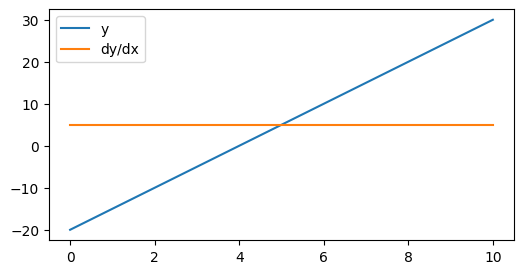

In [49]:
x = torch.linspace(0, 10, steps=10, requires_grad=True)
y = 5*x - 20
t=y.backward(torch.ones_like(x)) #Calcula el gradiente y le otorga un peso inicial de una capa de unos
print(x.grad)
##Tras estas lineas x.grad será la derivada de y con respecto a x.

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y') #Incluyes el .detach() para copiar una copia del tensor fuera del grafo de computación por seguridad.
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
plt.legend();

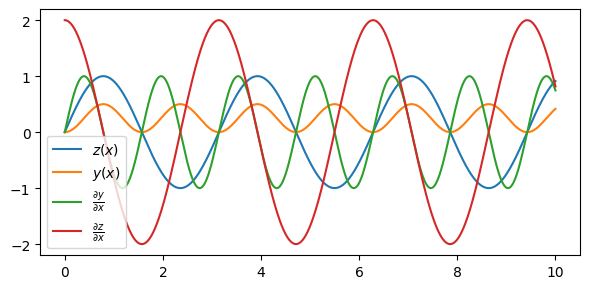

In [53]:
x = torch.linspace(0, 10, 1000, requires_grad=True) # Nodo hoja
z = torch.sin(2*x)
y = z.pow(2)/2


fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(x.detach().numpy(), z.detach().numpy(), label='$z(x)$')
ax.plot(x.detach().numpy(), y.detach().numpy(), label='$y(x)$')
# Derivada dy/dx
y.backward(torch.ones_like(x), retain_graph=True)
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label=r'$\frac{\partial{y}}{\partial{x}}$')
# Borro el resultado en x.grad
x.grad = None
# Derivada dz/dx
z.backward(torch.ones_like(x))
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label=r'$\frac{\partial{z}}{\partial{x}}$')
plt.legend();

In [ ]:
import torch
import torch.nn as nn

dense = torch.nn.Linear(3, 2) #Creas una red neuronal aleatoria de 3 entradas y 2 salidas

display(dense.weight, dense.bias) #Te devuelve los pesos y el sesgo de la función
dense(torch.Tensor([0, 0, 0])) #Evaluamos la red neuronal en ese tensor


Parameter containing:
tensor([[-0.1404,  0.3721,  0.3455],
        [ 0.2553, -0.0539,  0.3983]], requires_grad=True)

Parameter containing:
tensor([ 0.0720, -0.2814], requires_grad=True)

tensor([ 0.0720, -0.2814], grad_fn=<ViewBackward0>)

# **Curiosidades**

In [36]:
data=torch.randn(5) #Crea un tensor con 5 números aleatorios con media 0 y desviación estándar 1.
print(data) #lo muestra por pantalla
print(data.numpy()) #cambia el tipo del objeto tensor a un array
print(data.ndim) #tamaño del tensor
print(data.shape)#forma del tensor (vector,matriz,...)
print(data.dtype) #tipo de objeto del tensor
print(data.device) #en que procesador se ha guardado el tensor
data2=torch.linspace(0,10,6)
print(data2)
b=data2.reshape(2,3)
print(b)
print(b.flatten()) #Lo aplana en un vector de dimensión 1

###Las operaciones lógico-aritméticas son element-wise,es decir, se aplican a todos los elementos del tensor
print(data2.pow(2))
mask=data2>7
print(mask)
data2[mask]

tensor([ 0.0086, -2.2481,  0.1769,  1.9331, -1.5679])
[ 0.00864329 -2.2481277   0.17693375  1.9331328  -1.5678631 ]
1
torch.Size([5])
torch.float32
cpu
tensor([ 0.,  2.,  4.,  6.,  8., 10.])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])
tensor([ 0.,  2.,  4.,  6.,  8., 10.])
tensor([  0.,   4.,  16.,  36.,  64., 100.])
tensor([False, False, False, False,  True,  True])


tensor([ 8., 10.])